# Phospho proteomics checking


In [1]:
import math

import pandas as pd
import numpy as np

base_dir = '../data/S050_CCRCC_Clark_Cell2019/'
data_dir = f'{base_dir}downloaded_data/'
fig_dir = '../figures/data_qc/'
supp_dir = f'{base_dir}supps/'
output_dir = f'{base_dir}sircle/'
gene_name = 'hgnc_symbol'
# Proteomics 
# Need to make a sample sheet (i.e. with the clinical information associated with the cases)
# Let's just make it up for now
prot_og_df = pd.read_csv(f'{data_dir}6_CPTAC3_CCRCC_Whole_abundance_gene_protNorm=2_CB.tsv', sep='\t')
prot_df = pd.read_csv(f'{output_dir}prot_df_imputed.csv', index_col=0)
prot_df['external_gene_name'] = prot_df.index
clin_df = pd.read_csv(f'{data_dir}Patient_Clinical_Attributes.csv')
clin_prot_df = pd.read_csv(f'{data_dir}S044_CPTAC_CCRCC_Discovery_Cohort_Specimens_r1_Sept2018.csv')
# First things we want to merge this with our gene names etc
annotation_file = f'{supp_dir}hsapiens_gene_ensembl-GRCh38.p13_external_synonym.csv'
annot = pd.read_csv(annotation_file)
prot_df = prot_df.join(annot.set_index('external_gene_name'), how="left", rsuffix='_')
# Drop duplicates (we don't have any dups based on geen ID going into this so we know)
# that this was just introduced with the name mapping
meta_cols = [c for c in prot_df.columns if 'CPT' not in c and 'QC' not in c and 'NC' not in c]
# non-ccrcc cases as stated in Sup Table 1 from the study
non_ccrcc = ['C3L-00359', 'C3N-00313', 'C3N-00435', 'C3N-00492', 'C3N-00832', 'C3N-01175', 'C3N-01180']

cols = [c for c in prot_df.columns if 'CPT' in c]
prot_df = prot_df[meta_cols + cols]
prot_df

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,entrezgene_id,external_synonym,hgnc_symbol,CPT0079430001,...,CPT0012080003,CPT0021240003,CPT0009020003,CPT0017450001,CPT0009060003,CPT0012900004,CPT0017410003,CPT0009080003,CPT0012920003,CPT0009000003
A1BG,A1BG,ENSG00000121410,19,58345178.0,58353492.0,-1.0,1.0,NaN,A1BG,24.762998,...,25.407447,25.084466,25.794049,24.582934,24.875762,25.398878,25.23929,24.812949,25.320314,25.234656
A1CF,A1CF,ENSG00000148584,10,50799409.0,50885675.0,-1.0,29974.0,ACF,A1CF,21.803441,...,21.414654,20.563227,21.363325,21.573985,21.652046,22.094532,21.14661,21.843023,21.404158,21.215747
A1CF,A1CF,ENSG00000148584,10,50799409.0,50885675.0,-1.0,29974.0,ACF64,A1CF,21.803441,...,21.414654,20.563227,21.363325,21.573985,21.652046,22.094532,21.14661,21.843023,21.404158,21.215747
A1CF,A1CF,ENSG00000148584,10,50799409.0,50885675.0,-1.0,29974.0,ACF65,A1CF,21.803441,...,21.414654,20.563227,21.363325,21.573985,21.652046,22.094532,21.14661,21.843023,21.404158,21.215747
A1CF,A1CF,ENSG00000148584,10,50799409.0,50885675.0,-1.0,29974.0,APOBEC1CF,A1CF,21.803441,...,21.414654,20.563227,21.363325,21.573985,21.652046,22.094532,21.14661,21.843023,21.404158,21.215747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZEF1,ZZEF1,ENSG00000074755,17,4004445.0,4143030.0,-1.0,23140.0,FLJ10821,ZZEF1,22.462580,...,22.386080,22.465500,22.399780,22.479540,22.391350,22.256580,22.20671,22.461570,22.289010,22.429880
ZZEF1,ZZEF1,ENSG00000074755,17,4004445.0,4143030.0,-1.0,23140.0,KIAA0399,ZZEF1,22.462580,...,22.386080,22.465500,22.399780,22.479540,22.391350,22.256580,22.20671,22.461570,22.289010,22.429880
ZZEF1,ZZEF1,ENSG00000074755,17,4004445.0,4143030.0,-1.0,23140.0,ZZZ4,ZZEF1,22.462580,...,22.386080,22.465500,22.399780,22.479540,22.391350,22.256580,22.20671,22.461570,22.289010,22.429880
ZZZ3,ZZZ3,ENSG00000036549,1,77562416.0,77683419.0,-1.0,26009.0,ATAC1,ZZZ3,18.320770,...,18.381270,18.356620,18.252760,18.214290,18.463200,18.685680,18.34442,18.167880,18.258070,18.410360


In [30]:
phospho_prot_df = pd.read_csv(f'{data_dir}6_CPTAC3_CCRCC_Phospho_abundance_phosphopeptide_protNorm=2_CB_imputed_1211.tsv', sep='\t')
phospho_prot_df

,Index,Gene,Peptide,ReferenceIntensity,CPT0079430001,CPT0023360001,CPT0023350003,CPT0079410003,CPT0087040003,CPT0077310003,...,CPT0012080003,CPT0021240003,CPT0009020003,CPT0017450001,CPT0009060003,CPT0012900004,CPT0017410003,CPT0009080003,CPT0012920003,CPT0009000003
0,NP_000009.1_52_61,ACADVL,SDSHPSDALTR,21.417959,21.761176,21.718694,21.309462,21.142333,21.032659,20.897775,...,21.282943,20.967924,21.571221,21.578335,21.114262,21.403658,20.951904,21.757505,21.361459,21.439662
1,NP_000010.1_195_200,ACAT1,IHMGSCAENTAK,22.327380,22.530936,22.405770,22.119932,21.780781,21.876907,21.648481,...,22.184800,21.137826,22.348200,22.247994,21.916136,22.810727,21.317200,22.968150,22.463576,22.487031
2,NP_000011.2_155_161,ACVRL1,GLHSELGESSLILK,22.592515,22.128972,22.403675,22.589706,22.887970,23.350894,22.875935,...,22.688156,22.804701,22.287426,22.635473,22.444509,22.950870,22.725534,22.325998,22.372267,22.885955
3,NP_000017.1_9_13,ADSL,AAGGDHGSPDSYR,23.747509,23.904101,23.726398,23.582186,24.033232,23.863450,24.031663,...,23.882674,24.081865,23.235960,23.859549,23.945124,24.093499,23.399682,23.605715,23.145256,24.093286
4,NP_000017.1_9_19,ADSL,AAGGDHGSPDSYRSPLASR,22.380822,22.507791,22.295678,22.420174,22.536810,22.368111,22.474957,...,22.367719,22.753779,22.089366,22.524299,22.442299,22.261267,22.195088,22.370109,22.000181,22.381184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20971,NP_998754.1_845_860,RAPH1,QQSFCAKPPPSPLSPVPSVVK,25.319744,25.852331,26.276820,24.691365,24.862791,24.688595,25.046265,...,25.044381,25.306795,25.296651,25.290435,25.286176,24.812464,25.130971,24.879890,25.767267,25.129330
20972,NP_998754.1_867_894,RAPH1,QIASQFPPPPTPPAMESQPLKPVPANVAPQSPPAVK,25.265568,25.686558,25.924294,24.652317,24.926187,24.636498,25.176439,...,25.072751,25.388786,25.264870,25.240537,25.193915,25.098189,24.925202,25.262182,25.481954,25.370581
20973,NP_998754.1_983_985,RAPH1,SSSGAEHPEPK,20.411702,20.881818,20.950593,20.284714,20.362307,20.313694,20.162719,...,20.283746,20.412700,20.779037,20.849822,20.150783,20.229844,20.404295,20.608771,20.891060,20.102807
20974,NP_998771.3_469_478,SLC16A12,TQLQFIAKESDPK,23.242735,24.643193,24.790644,21.862674,22.495721,21.703528,21.893988,...,20.806118,20.867537,23.765850,24.378933,22.044204,23.302226,21.382754,23.084380,24.153484,21.031542


In [10]:
# Check one of the data from Supp6 from the paper:
# Kinse_substrate_before ranking
#Kinase	Sub.Accession	Sub.Gene	Sub.Seq	Sites	CPT0001540009-CPT0001550001	CPT0001220008-CPT0001230001	CPT0001340003-CPT0001350001	CPT0001500009-CPT0001510001	CPT0001260009-CPT0001270001	CPT0000870016-CPT0000890001	CPT0001180009-CPT0001190001	CPT0000780007-CPT0000790001	CPT0000640003-CPT0000660001	CPT0066470004-CPT0066430001	CPT0002350011-CPT0002370001	CPT0006440003-CPT0006530001	CPT0010110003-CPT0010120001	CPT0006630003-CPT0006730001	CPT0006900003-CPT0006950001	CPT0010160003-CPT0010170001	CPT0023350003-CPT0023360001	CPT0007320003-CPT0007470001	CPT0019130003-CPT0019160001	CPT0079270003-CPT0079300001	CPT0025050003-CPT0025060001	CPT0026410003-CPT0026420001	CPT0065810003-CPT0065820001	CPT0063320003-CPT0063330001	CPT0064370003-CPT0064400001	CPT0086360003-CPT0086370003	CPT0007860003-CPT0007870001	CPT0023690003-CPT0023710001	CPT0079480003-CPT0079510001	CPT0086950003-CPT0086970003	CPT0079410003-CPT0079430001	CPT0063630003-CPT0063640001	CPT0086820003-CPT0086830003	CPT0087040003-CPT0087050003	CPT0092160003-CPT0092190003	CPT0086870003-CPT0086890003	CPT0092290003-CPT0092310003	CPT0092730003-CPT0092740003	CPT0092790003-CPT0092800003	CPT0081600003-CPT0081620001	CPT0084560003-CPT0084590001	CPT0066480003-CPT0066520001	CPT0019990003-CPT0020020001	CPT0020120003-CPT0020130001	CPT0014160003-CPT0014130001	CPT0014450004-CPT0014470001	CPT0014370004-CPT0014350001	CPT0025580004-CPT0025610001	CPT0009000003-CPT0009020003	CPT0009060003-CPT0009080003	CPT0012280003-CPT0012290003	CPT0012370003-CPT0013790003	CPT0017410003-CPT0017450001	CPT0012550003-CPT0012570003	CPT0012670003-CPT0012640003	CPT0012900004-CPT0012920003	CPT0078510003-CPT0078530001	CPT0069000003-CPT0069010001	CPT0069160003-CPT0069190001	CPT0081990003-CPT0082010001	CPT0025880003-CPT0025920001	CPT0089020003-CPT0089040001	CPT0078830003-CPT0078840001	CPT0024670003-CPT0024680001	CPT0065430003-CPT0065450001	CPT0078930003-CPT0078940001	CPT0078990003-CPT0079000001	CPT0088900003-CPT0088920001	CPT0075130003-CPT0075170001	CPT0075560003-CPT0075570001	CPT0076330003-CPT0076350001	CPT0077490003-CPT0077500001	CPT0088760003-CPT0088780001	CPT0077110003-CPT0077140001	CPT0077310003-CPT0077320001	CPT0088480003-CPT0088500001	CPT0088550004-CPT0088570001	CPT0088630003-CPT0088640003	CPT0088690003-CPT0088710001	CPT0089460004-CPT0089480003
#EGFR	NP_002645.3	PKM	ITLDNAYMEK	Y148	0.78	0.66	1.12	0.93	1.56	2.23	1.3	1.41	2.34	1.11	0.76	2.69	0.87	1.66	0.81	1.8	0.41	0.71	0.56	1.36	0.7	1.26	1.97	1.44	0.9	0.65	1.33	0.96	1.6	0.43	0.58	0.96	0.43	0.79	0.71	0.54	0.34	0.79	1.08	0.59	0.6	0.94	1.45	0.69	1.11	0.83	0.31	1.08	1.18	-0.44	0.73	1.27	0.7	0.81	-0.12	1.54	0.67	0.48	0.49	2.05	0.79	1.49	1.4	-0.079	0.2	1.32	1.46	1.49	1.62	1.07	0.37	1.15	1.09	1.17	1.45	0.51	0.8	-0.047	1	0.82
pkm = phospho_prot_df[phospho_prot_df['Peptide'] == 'ITLDNAYMEK'] 
pkm['CPT0001220008'] - pkm['CPT0001230001']

11272    0.657937
dtype: float64

## Add in sample info to the protein dataset

While we have the aliqout IDs, we want to add in other info, such as patient demographics we may use
for performing DE analysis experiments


In [31]:
# In the protein dataframe they use the Aliquot ID rather than the case ID
# We want to match this to the case and if it was tumour or normal sample

# Get the protein aliqot IDs and we want to match these with patient info
p_Aliquot_ID = [c for c in phospho_prot_df.columns if 'CPT' in c]

# Get the patient info
sample_type = clin_prot_df['Group'].values
cond_ids = []
cond_names = []
case_ids = []
cases = clin_prot_df['ParticipantID'].values

# Iterate though the different aliqots
for cp in p_Aliquot_ID:
    # Iterate through the clinical samples to find a match
    for i, c in enumerate(clin_prot_df['Aliquot ID'].values):
        if c == cp:
            cond_names.append(sample_type[i])
            case_ids.append(cases[i])
            if sample_type[i] == 'Tumor':
                cond_ids.append(1)
            else:
                cond_ids.append(0)
            break

# Make a sample Dataframe
prot_sample_data = pd.DataFrame()
prot_sample_data['AliquotID'] = p_Aliquot_ID
prot_sample_data['CondName'] = cond_names
prot_sample_data['CondId'] = cond_ids
prot_sample_data['CaseId'] = case_ids
prot_sample_data['SafeCases'] = [c.replace('-', '.') for c in case_ids]
prot_sample_data['FullLabel'] = [f'{cond_names[i]}_{case_ids[i].replace("-", ".")}_{a}' for i, a in enumerate(p_Aliquot_ID)]
prot_sample_data

,AliquotID,CondName,CondId,CaseId,SafeCases,FullLabel
0,CPT0079430001,Normal,0,C3L-01287,C3L.01287,Normal_C3L.01287_CPT0079430001
1,CPT0023360001,Normal,0,C3L-00561,C3L.00561,Normal_C3L.00561_CPT0023360001
2,CPT0023350003,Tumor,1,C3L-00561,C3L.00561,Tumor_C3L.00561_CPT0023350003
3,CPT0079410003,Tumor,1,C3L-01287,C3L.01287,Tumor_C3L.01287_CPT0079410003
4,CPT0087040003,Tumor,1,C3L-01603,C3L.01603,Tumor_C3L.01603_CPT0087040003
...,...,...,...,...,...,...
189,CPT0012900004,Tumor,1,C3N-00494,C3N.00494,Tumor_C3N.00494_CPT0012900004
190,CPT0017410003,Tumor,1,C3N-00390,C3N.00390,Tumor_C3N.00390_CPT0017410003
191,CPT0009080003,Normal,0,C3N-00312,C3N.00312,Normal_C3N.00312_CPT0009080003
192,CPT0012920003,Normal,0,C3N-00494,C3N.00494,Normal_C3N.00494_CPT0012920003


In [32]:
# Rename the columns to have the aliqiot ID in it
column_map = {}
for i, a in enumerate(p_Aliquot_ID):
    column_map[a] = f'{cond_names[i]}_{case_ids[i].replace("-", ".")}_phospho-{a}'
phospho_prot_df = phospho_prot_df.rename(columns=column_map)
phospho_prot_df.to_csv(f'{output_dir}phospho_protein_df.csv', index=False)

In [34]:
prot_df = pd.read_csv(f'{output_dir}prot_data_sircle_ccRCC.csv')
prot_df

,external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,entrezgene_id,external_synonym,hgnc_symbol,original_gene_id,...,Protein_Normal_C3N.01646_CPT0088500001,Protein_Tumor_C3N.01646_CPT0088480003,Protein_Tumor_C3N.01648_CPT0088550004,Protein_Normal_C3N.01648_CPT0088570001,Protein_Tumor_C3N.01649_CPT0088630003,Protein_Normal_C3N.01649_CPT0088640003,Protein_Normal_C3N.01651_CPT0088710001,Protein_Tumor_C3N.01651_CPT0088690003,Protein_Normal_C3N.01808_CPT0089480003,Protein_Tumor_C3N.01808_CPT0089460004
0,IFITM2,ENSG00000185201,11,303655.0,309397.0,1.0,10581.0,1-8D,IFITM2,IFITM2,...,17.242808,17.341401,17.276320,17.214368,17.418534,17.475385,17.512245,17.269921,16.677501,17.253800
1,IFITM3,ENSG00000142089,11,319676.0,329475.0,-1.0,10410.0,1-8U,IFITM3,IFITM3,...,20.580569,21.422762,21.138186,20.541807,21.600754,20.612185,20.882283,21.092480,20.601086,21.344087
2,PRDX6,ENSG00000117592,1,173477330.0,173488815.0,1.0,9588.0,1-Cys,PRDX6,PRDX6,...,26.012760,25.911260,25.779640,26.081670,25.650650,26.092640,26.081900,25.990450,26.254320,26.170450
3,ALDH1L1,ENSG00000144908,3,126103562.0,126197994.0,-1.0,10840.0,10-fTHF,ALDH1L1,ALDH1L1,...,25.500336,24.123117,24.539930,25.884126,23.804339,25.431972,26.135252,23.710141,26.240426,24.783373
4,KNOP1,ENSG00000103550,16,19701937.0,19718235.0,-1.0,400506.0,101F10.1,KNOP1,KNOP1,...,17.308228,17.813241,17.935471,17.406868,17.576764,17.278729,17.122735,17.993586,17.262391,18.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11350,ZNF827,ENSG00000151612,4,145757627.0,145938823.0,-1.0,152485.0,NaN,ZNF827,ZNF827,...,16.549910,16.189710,16.238320,16.444590,16.278300,16.460540,16.249870,16.181790,16.276270,16.363320
11351,ZNF865,ENSG00000261221,19,55605647.0,55617269.0,1.0,100507290.0,NaN,ZNF865,ZNF865,...,18.515980,18.271680,18.364140,18.489010,18.436500,18.481750,18.980530,18.138080,18.500360,18.502200
11352,ZNF888,ENSG00000213793,19,52904415.0,52923470.0,-1.0,388559.0,NaN,ZNF888,ZNF888,...,14.635330,14.775910,14.810620,14.618430,14.785150,14.594220,14.555330,14.751380,14.574110,14.761570
11353,ZNRD1,ENSG00000066379,NaN,NaN,NaN,NaN,30834.0,NaN,POLR1H,ZNRD1,...,18.251270,18.513290,18.592980,18.300450,18.510970,18.473130,18.274910,18.668260,18.395860,18.408350


In [36]:
phospho_prot_df.set_index('Gene', inplace=True)
prot_df.set_index('external_gene_name', inplace=True)
joined_df = phospho_prot_df.join(prot_df, how='left')
joined_df

,Index,Peptide,ReferenceIntensity,Normal_C3L.01287_phospho-CPT0079430001,Normal_C3L.00561_phospho-CPT0023360001,Tumor_C3L.00561_phospho-CPT0023350003,Tumor_C3L.01287_phospho-CPT0079410003,Tumor_C3L.01603_phospho-CPT0087040003,Tumor_C3N.01524_phospho-CPT0077310003,Normal_C3N.01524_phospho-CPT0077320001,...,Protein_Normal_C3N.01646_CPT0088500001,Protein_Tumor_C3N.01646_CPT0088480003,Protein_Tumor_C3N.01648_CPT0088550004,Protein_Normal_C3N.01648_CPT0088570001,Protein_Tumor_C3N.01649_CPT0088630003,Protein_Normal_C3N.01649_CPT0088640003,Protein_Normal_C3N.01651_CPT0088710001,Protein_Tumor_C3N.01651_CPT0088690003,Protein_Normal_C3N.01808_CPT0089480003,Protein_Tumor_C3N.01808_CPT0089460004
A1CF,NP_001185747.1_476_491,ITIPALASQNPAIHPFTPPK,20.453126,20.449142,20.885241,20.185938,20.525450,20.451730,20.519747,19.648479,...,21.703028,20.833115,20.833245,21.499587,20.710021,21.460528,21.844864,21.809387,21.994794,21.718692
AAAS,NP_001166937.1_452_462,IAHIPLYFVNAQFPRFSPVLGR,23.108998,22.057504,22.340435,23.228205,23.469294,23.094490,23.286889,22.829507,...,21.234175,21.458443,21.207059,21.241072,21.283221,21.201960,21.213362,21.356652,21.222759,21.407700
AAAS,NP_001166937.1_462_462,FSPVLGR,25.806906,25.731148,25.769810,25.948758,26.427664,25.975726,25.913938,25.432394,...,21.234175,21.458443,21.207059,21.241072,21.283221,21.201960,21.213362,21.356652,21.222759,21.407700
AAED1,NP_714542.1_12_26,QVSGAAALVPAPSGPDSGQPLAAAVAELPVLDAR,21.927467,21.395114,20.843158,22.025712,22.196850,21.675030,21.987204,21.363302,...,16.738174,17.076733,17.084533,16.749497,17.002491,16.815960,16.536287,16.838677,16.824587,17.208924
AAGAB,NP_001258814.1_201_202,AFWMAIGGDRDEIEGLSSDEEH,23.474450,23.933374,23.925157,23.473935,23.411468,23.036560,23.047834,23.528933,...,21.210292,21.175936,21.278753,21.258959,20.928010,21.108272,21.105292,21.011580,21.137876,21.188299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZEF1,NP_055928.3_2036_2064,DPSCQTQISDSPADASPPTGLPDAEDSEVSSQKPIEEK,20.409363,20.677790,20.727328,20.411733,20.225733,20.227110,20.326844,20.535013,...,22.236100,22.483780,22.483120,22.423540,22.396560,22.470660,22.380040,22.171580,22.429060,22.200750
ZZEF1,NP_055928.3_2443_2444,EINALAEHGDLELDERGDREEEVERPVSSPGDPEQK,24.083359,24.407275,24.054662,24.262107,24.016887,24.105712,24.372652,23.739350,...,22.236100,22.483780,22.483120,22.423540,22.396560,22.470660,22.380040,22.171580,22.429060,22.200750
ZZZ3,NP_056349.1_109_113,RQTEPVSPVLK,23.378570,23.622857,23.770220,23.312709,23.028803,22.709243,23.785112,23.259046,...,18.346630,18.279890,18.343030,18.432600,18.166120,18.356000,18.418770,18.115130,18.226970,18.723950
ZZZ3,NP_056349.1_388_393,AAPTRGSPTK,22.873652,23.330099,22.726409,22.234700,23.072836,23.772500,23.056753,23.253603,...,18.346630,18.279890,18.343030,18.432600,18.166120,18.356000,18.418770,18.115130,18.226970,18.723950


In [48]:
[c for c in joined_df if 'C3L.01287' in c]

['Normal_C3L.01287_phospho-CPT0079430001',
 'Tumor_C3L.01287_phospho-CPT0079410003',
 'Protein_Normal_C3L.01287_CPT0079430001',
 'Protein_Tumor_C3L.01287_CPT0079410003']

In [49]:
norm_phospho_prot_df = phospho_prot_df[['Index', 'Peptide']].copy()
norm_phospho_prot_df['Gene'] = phospho_prot_df.index.values
for c in phospho_prot_df.columns:
    if 'CPT' in c:
        try:
            norm_phospho_prot_df[c] = phospho_prot_df[c].values - joined_df['Protein_' + c.replace('phospho-', '')].values
        except:
            print(c)

Tumor_C3L.00359_phospho-CPT0002270011
Tumor_C3N.01180_phospho-CPT0088970003
Tumor_C3N.01175_phospho-CPT0078660003
Normal_C3N.01175_phospho-CPT0078670001
Tumor_C3N.00832_phospho-CPT0078800003
Tumor_C3N.00313_phospho-CPT0011410003
Normal_C3N.00492_phospho-CPT0012770003
Tumor_C3N.00492_phospho-CPT0079180003
Normal_C3N.00435_phospho-CPT0018250001
Tumor_C3N.00435_phospho-CPT0017850003


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.720e-25 U_stat=5.930e+02


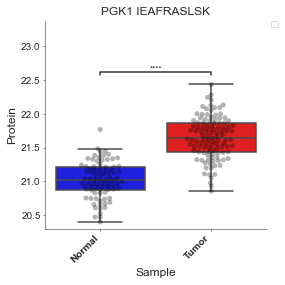

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.874e-23 U_stat=7.690e+02


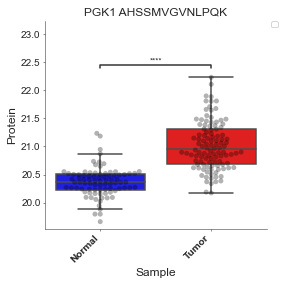

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.696e-08 U_stat=2.465e+03


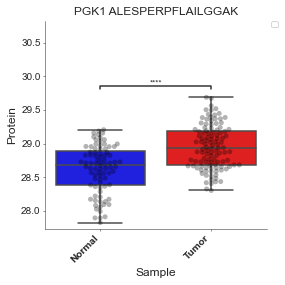

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.653e-11 U_stat=2.037e+03


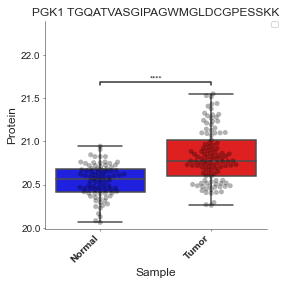

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.338e-15 U_stat=7.673e+03


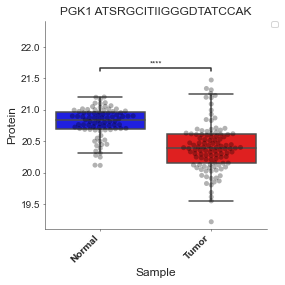

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.055e-12 U_stat=1.970e+03


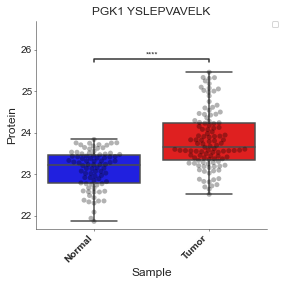

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.287e-32 U_stat=5.700e+01


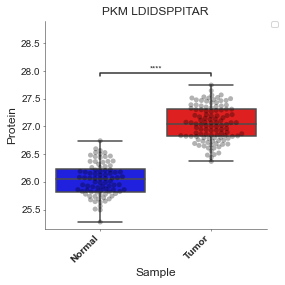

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.100e-31 U_stat=8.100e+01


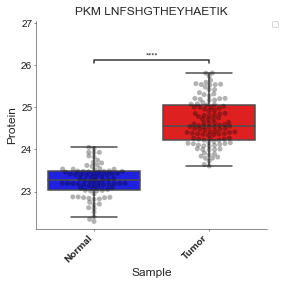

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.014e-22 U_stat=8.180e+02


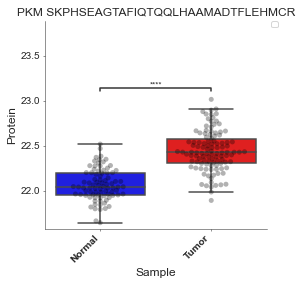

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.948e-30 U_stat=2.140e+02


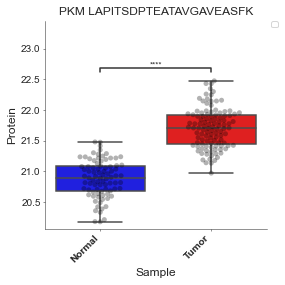

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.550e-32 U_stat=4.400e+01


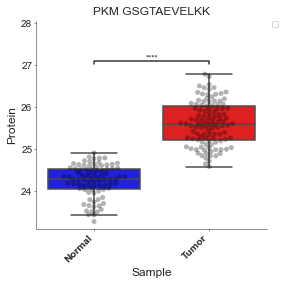

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.005e-27 U_stat=3.910e+02


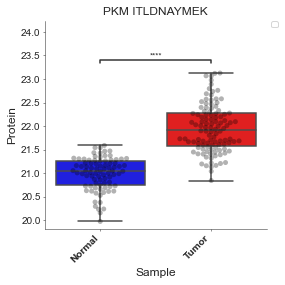

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.752e-32 U_stat=6.500e+01


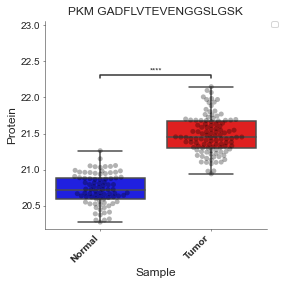

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.777e-08 U_stat=2.437e+03


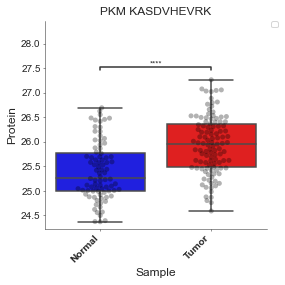

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.821e-29 U_stat=2.520e+02


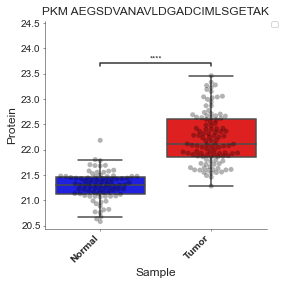

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.360e-32 U_stat=7.200e+01


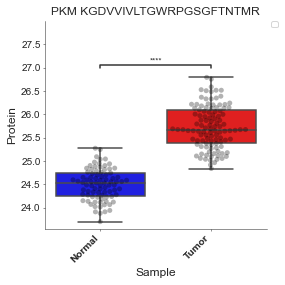

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.145e-31 U_stat=1.030e+02


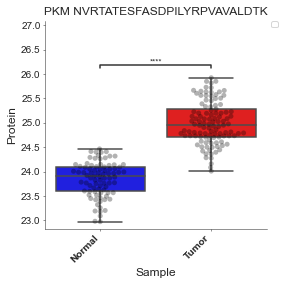

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.995e-02 U_stat=5.299e+03


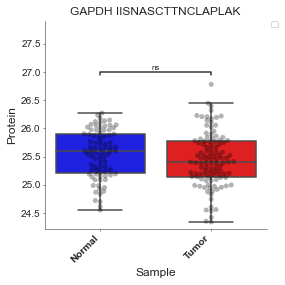

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.124e-03 U_stat=3.429e+03


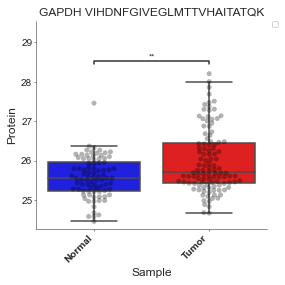

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.583e-05 U_stat=3.058e+03


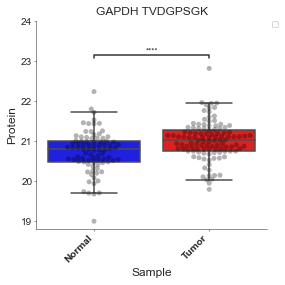

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.290e-02 U_stat=3.656e+03


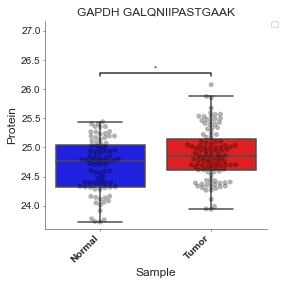

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.028e-20 U_stat=1.031e+03


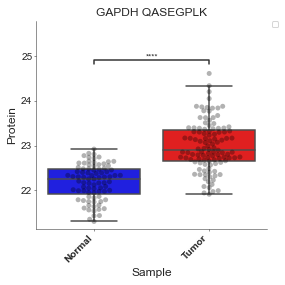

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.768e-03 U_stat=3.588e+03


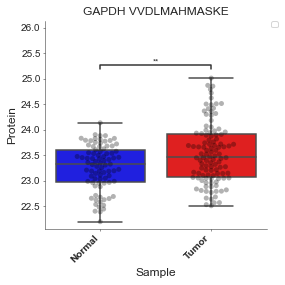

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.206e-01 U_stat=4.018e+03


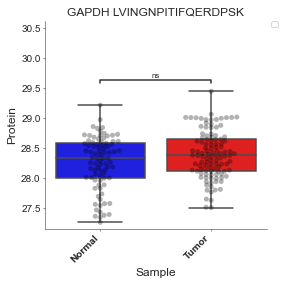

In [75]:

for gene in ['PGK1', 'PKM', 'GAPDH']:
    df = phospho_prot_df[phospho_prot_df.index == gene]
    for i, p in enumerate(df['Peptide'].values):
        labels = []
        values = []
        peptide = []
        for c in df.columns:
            if 'Normal' in c:
                labels.append('Normal')
                values.append(df[c].values[i])
                peptide.append(p)
            elif 'Tumor' in c:
                labels.append('Tumor')
                values.append(df[c].values[i])
                peptide.append(p)
        p_df = pd.DataFrame()
        p_df['Sample Type'] = labels
        p_df['values'] = values
        p_df['peptide'] = peptide
        fig_size = (4, 4)
        vis_opts = {"figsize": fig_size, "title_font_size": 12, "axis_font_size": 10, 
                   'palette': ['blue', 'red']}

        b = Boxplot(p_df, x='Sample Type', y="values", add_dots=True, 
                add_stats=True, title=f'{gene} {p}',
                xlabel="Sample", ylabel=f"Protein", config=vis_opts)
        b.plot()
        plt.show()

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.119e-29 U_stat=1.720e+02


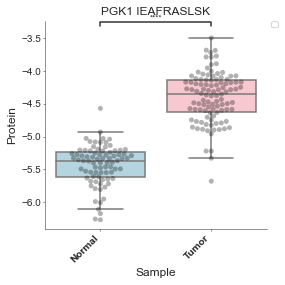

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.777e-27 U_stat=2.760e+02


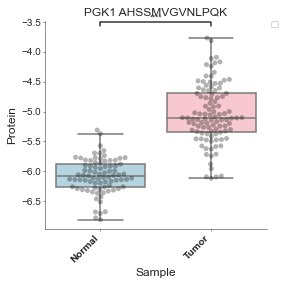

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.422e-22 U_stat=7.300e+02


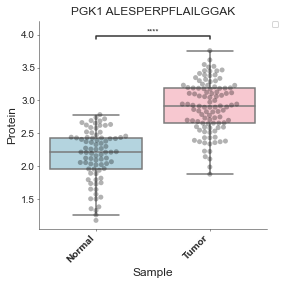

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.309e-27 U_stat=2.660e+02


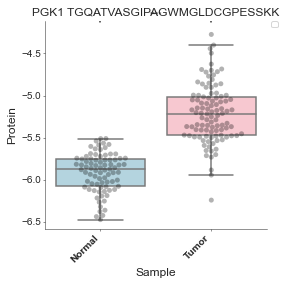

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.224e-13 U_stat=6.831e+03


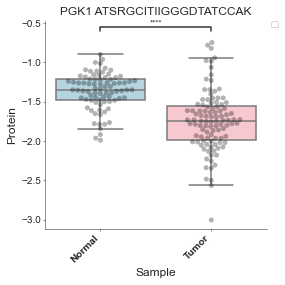

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.262e-13 U_stat=1.559e+03


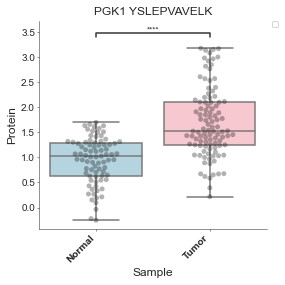

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.178e-29 U_stat=1.150e+02


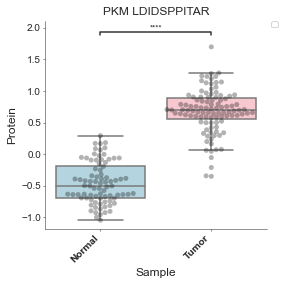

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.383e-30 U_stat=8.400e+01


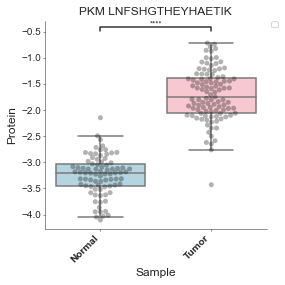

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.937e-18 U_stat=1.029e+03


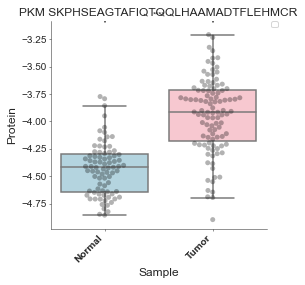

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.651e-31 U_stat=3.700e+01


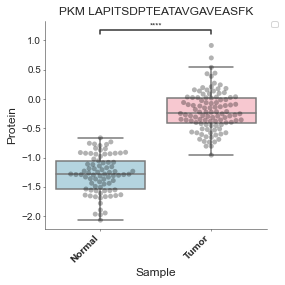

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.571e-30 U_stat=1.050e+02


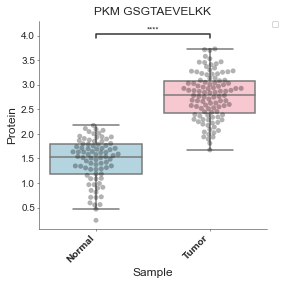

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.623e-25 U_stat=4.840e+02


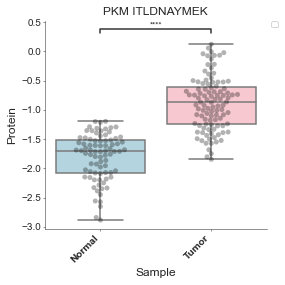

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.563e-27 U_stat=3.070e+02


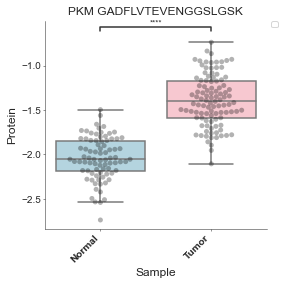

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.501e-06 U_stat=2.526e+03


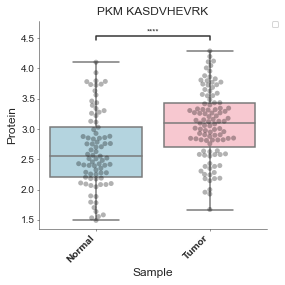

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.396e-25 U_stat=4.400e+02


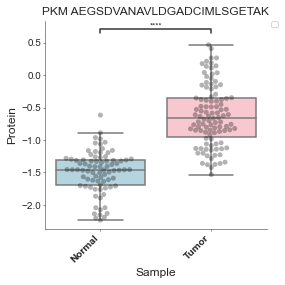

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.289e-28 U_stat=1.910e+02


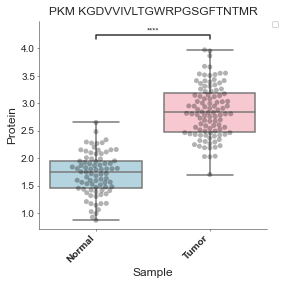

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.045e-29 U_stat=1.540e+02


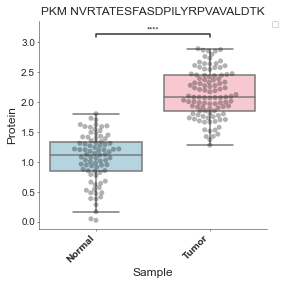

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.046e-01 U_stat=3.589e+03


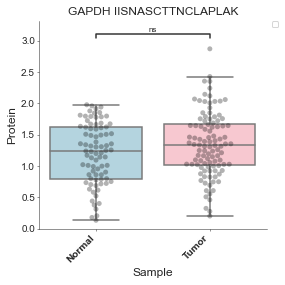

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.413e-08 U_stat=2.208e+03


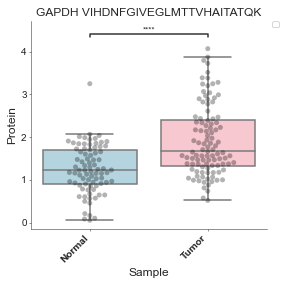

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.366e-05 U_stat=2.770e+03


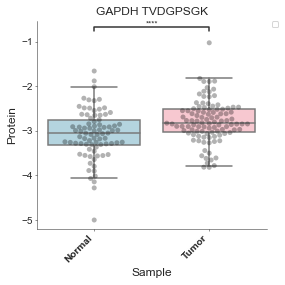

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.031e-02 U_stat=3.251e+03


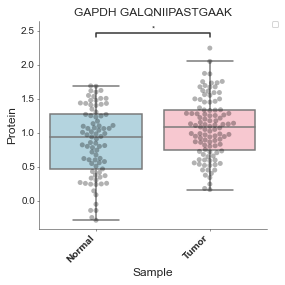

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.419e-18 U_stat=1.038e+03


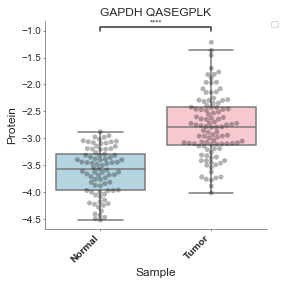

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.611e-03 U_stat=3.197e+03


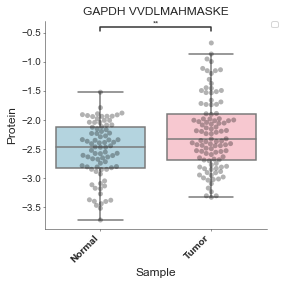

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.120e-01 U_stat=3.601e+03


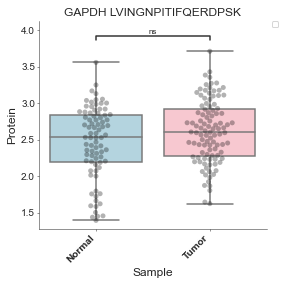

In [77]:

for gene in ['PGK1', 'PKM', 'GAPDH']:
    df = norm_phospho_prot_df[norm_phospho_prot_df.index == gene]
    for i, p in enumerate(df['Peptide'].values):
        labels = []
        values = []
        peptide = []
        for c in df.columns:
            if 'Normal' in c:
                labels.append('Normal')
                values.append(df[c].values[i])
                peptide.append(p)
            elif 'Tumor' in c:
                labels.append('Tumor')
                values.append(df[c].values[i])
                peptide.append(p)
        p_df = pd.DataFrame()
        p_df['Sample Type'] = labels
        p_df['values'] = values
        p_df['peptide'] = peptide
        fig_size = (4, 4)
        vis_opts = {"figsize": fig_size, "title_font_size": 12, "axis_font_size": 10, 
                   'palette': ['lightblue', 'pink']}

        b = Boxplot(p_df, x='Sample Type', y="values", add_dots=True, 
                add_stats=True, title=f'{gene} {p}',
                xlabel="Sample", ylabel=f"Protein", config=vis_opts)
        b.plot()
        plt.show()